# thinst : thin data spatiotemporally

## Setup

### Install thinst (if not already installed)
Uncomment and run the box below to install thinst if it has not already been installed. This exemplar will also require numpy and pandas to be installed.

In [1]:
# %pip install thinst

### Import thinst (as well as numpy and pandas)

In [2]:
from thinst import *
import numpy as np
import pandas as pd

### Make sample dataset
We randomly generate 100 datapoints spread across two spatial axes (x and y) and a temporal axis (z).

In [3]:
sample_size = 100  # set sample size

x_min, x_max = 0, 100000  # set spatial limits (x axis)
y_min, y_max = 0, 100000  # set spatial limits (y axis)
z_min, z_max = pd.to_datetime('2020-01-01 00:00:00'), pd.to_datetime('2022-12-31 23:59:59')  # set temporal limits

random_xs = np.random.uniform(x_min, x_max, size=sample_size)  # generate random points (x coordinates)
random_ys = np.random.uniform(y_min, y_max, size=sample_size)  # generate random points (y coordinates)
random_xys = [(x, y) for x, y in zip(random_xs, random_ys)]  # generate random points
random_zs = [pd.to_datetime(int(r), unit='s') for r in np.random.uniform(low=z_min.timestamp(), high=z_max.timestamp(), size=sample_size)]  # generate random datetimes

samples = pd.DataFrame({'points': random_xys, 'datetimes': random_zs})  # DataFrame of the random samples
samples = samples.sort_values('datetimes').reset_index(drop=True)  # sort by datetime

### Set the thinning parameters
Before thinning the data, we set a spatial and temporal threshold to use for thinning. Additionally, we set the unit of the temporal threshold.

In [4]:
# Set thinning parameters
sp_threshold = 10000
tm_threshold = 30
tm_unit = 'day'

### View the sample dataset as...
Before thinning, we can view the samples as:
- a DataFrame
- a spatial plot (with the spatial threshold illustrated by a pale circle around each dot)
- a temporal plot (with the temporal threshold illustrated by a pale line centred around each dot; note that the y axis is meaningless and serves only to space the dots)

In [5]:
samples

,points,datetimes
0,"(52997.39833728901, 8278.722300599995)",2020-01-10 08:53:04
1,"(82769.58824284984, 99480.66287216458)",2020-02-06 15:09:28
2,"(25952.25205332836, 53136.62841361912)",2020-02-06 23:41:59
3,"(94656.22138551166, 27905.347583458595)",2020-03-09 16:44:08
4,"(63912.8921694586, 44204.99595435484)",2020-03-11 16:25:31
...,...,...
95,"(78225.83809990321, 43156.74381635971)",2022-12-17 14:56:34
96,"(287.244820227428, 83784.03129418046)",2022-12-19 13:02:43
97,"(23749.360404842955, 53577.62033434989)",2022-12-23 05:43:10
98,"(65691.23814826578, 65294.07236925142)",2022-12-28 05:24:26


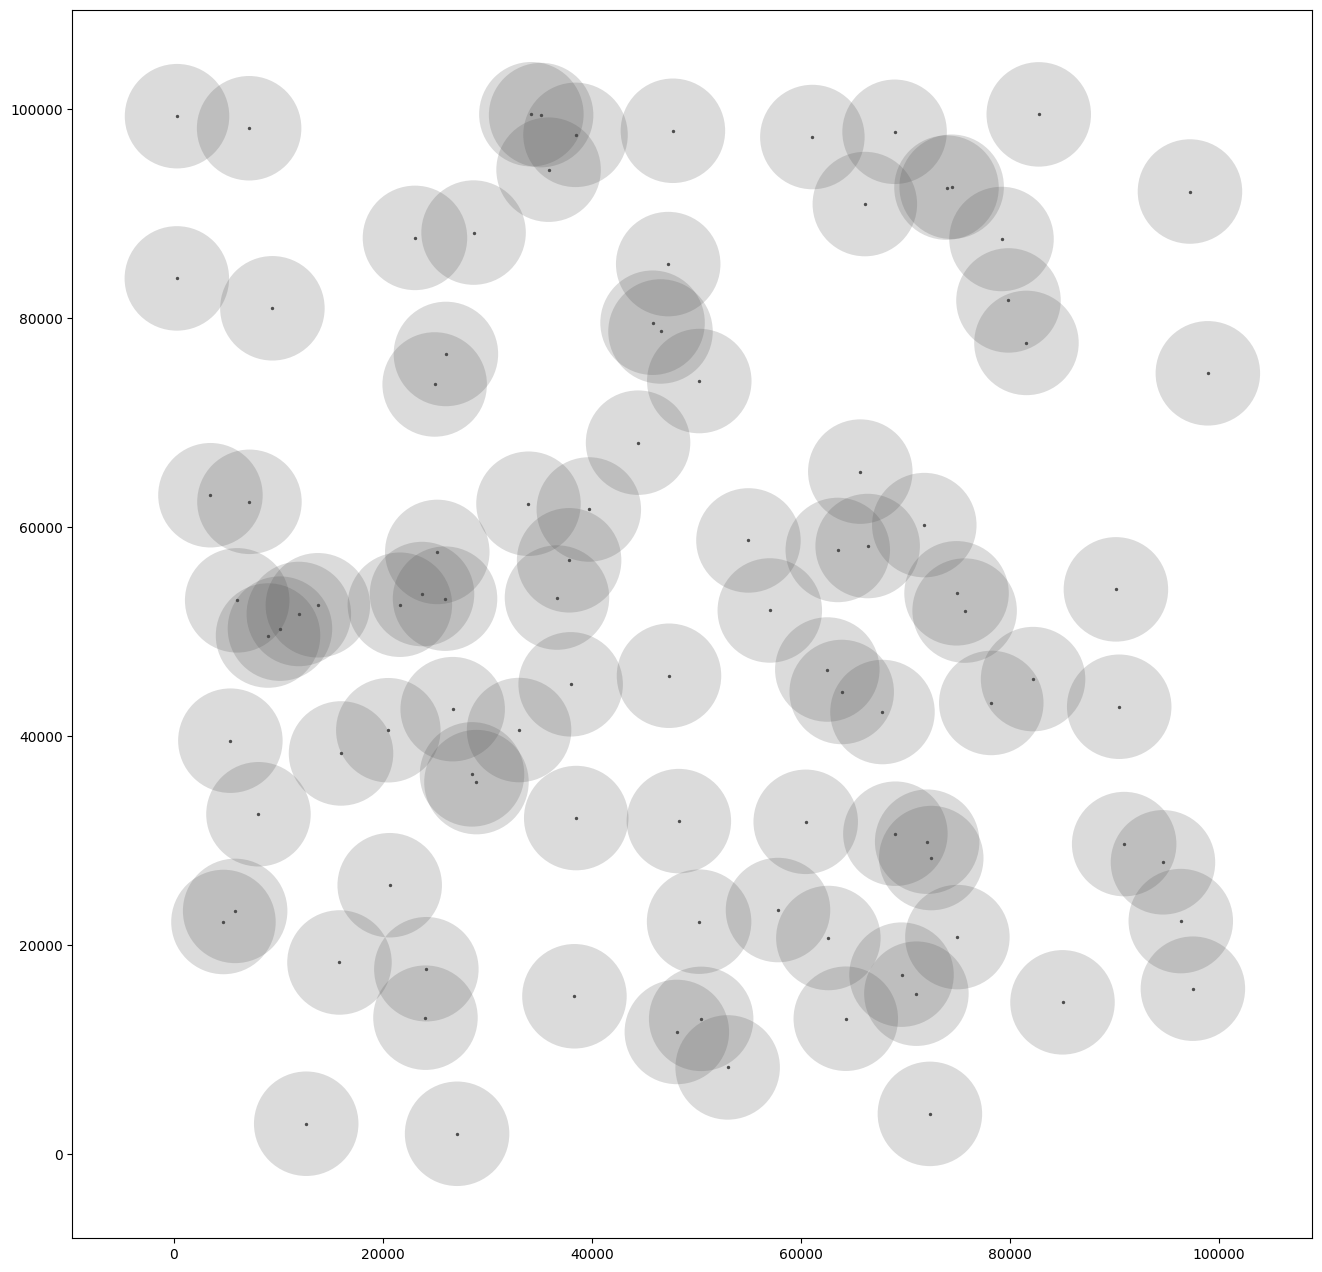

In [6]:
plots.spatial(df=samples, points='points', sp_threshold=sp_threshold)

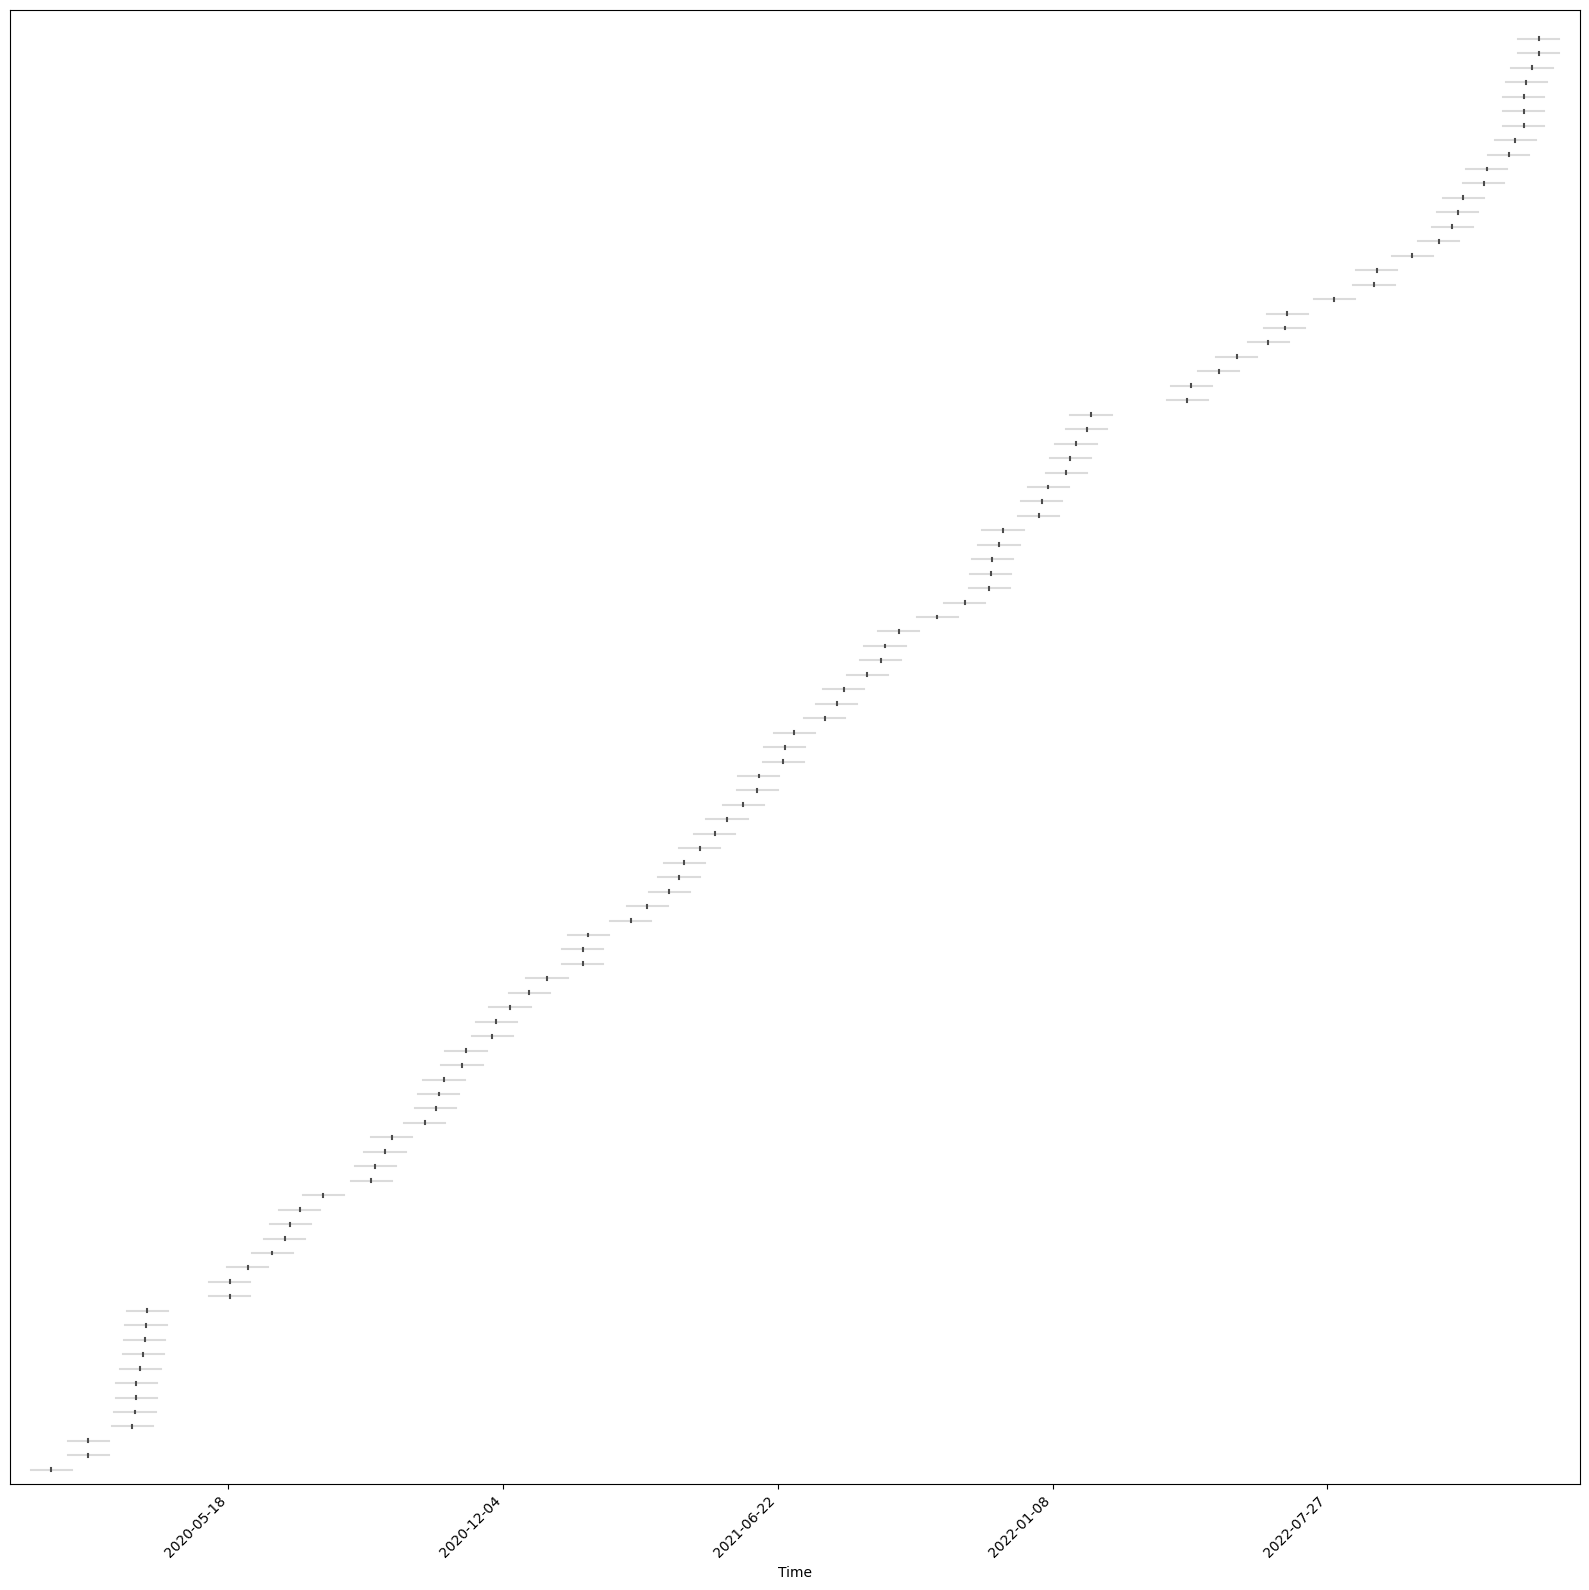

In [7]:
plots.temporal(df=samples, datetimes='datetimes', tm_threshold=tm_threshold, tm_unit=tm_unit)

## Spatial thin
Here, we conduct a spatial only thin.
<br>The resulting DataFrame ```samples_kept``` contains only those datapoints that were kept after thinning.

In [8]:
samples_kept = thinst(df=samples, points='points', sp_threshold=sp_threshold)

For the sake of comparison, we can also get those datapoints that were removed with the following code.

In [9]:
samples_removed = samples.copy().loc[~samples.index.isin(samples_kept.index)]

### View the result
We now make two plots:
- the first of the kept datapoints (as blue dots with the spatial threshold illustrated by a pale circle around each dot)
- the second of the kept datapoints (blue) and the removed datapoints (yellow)

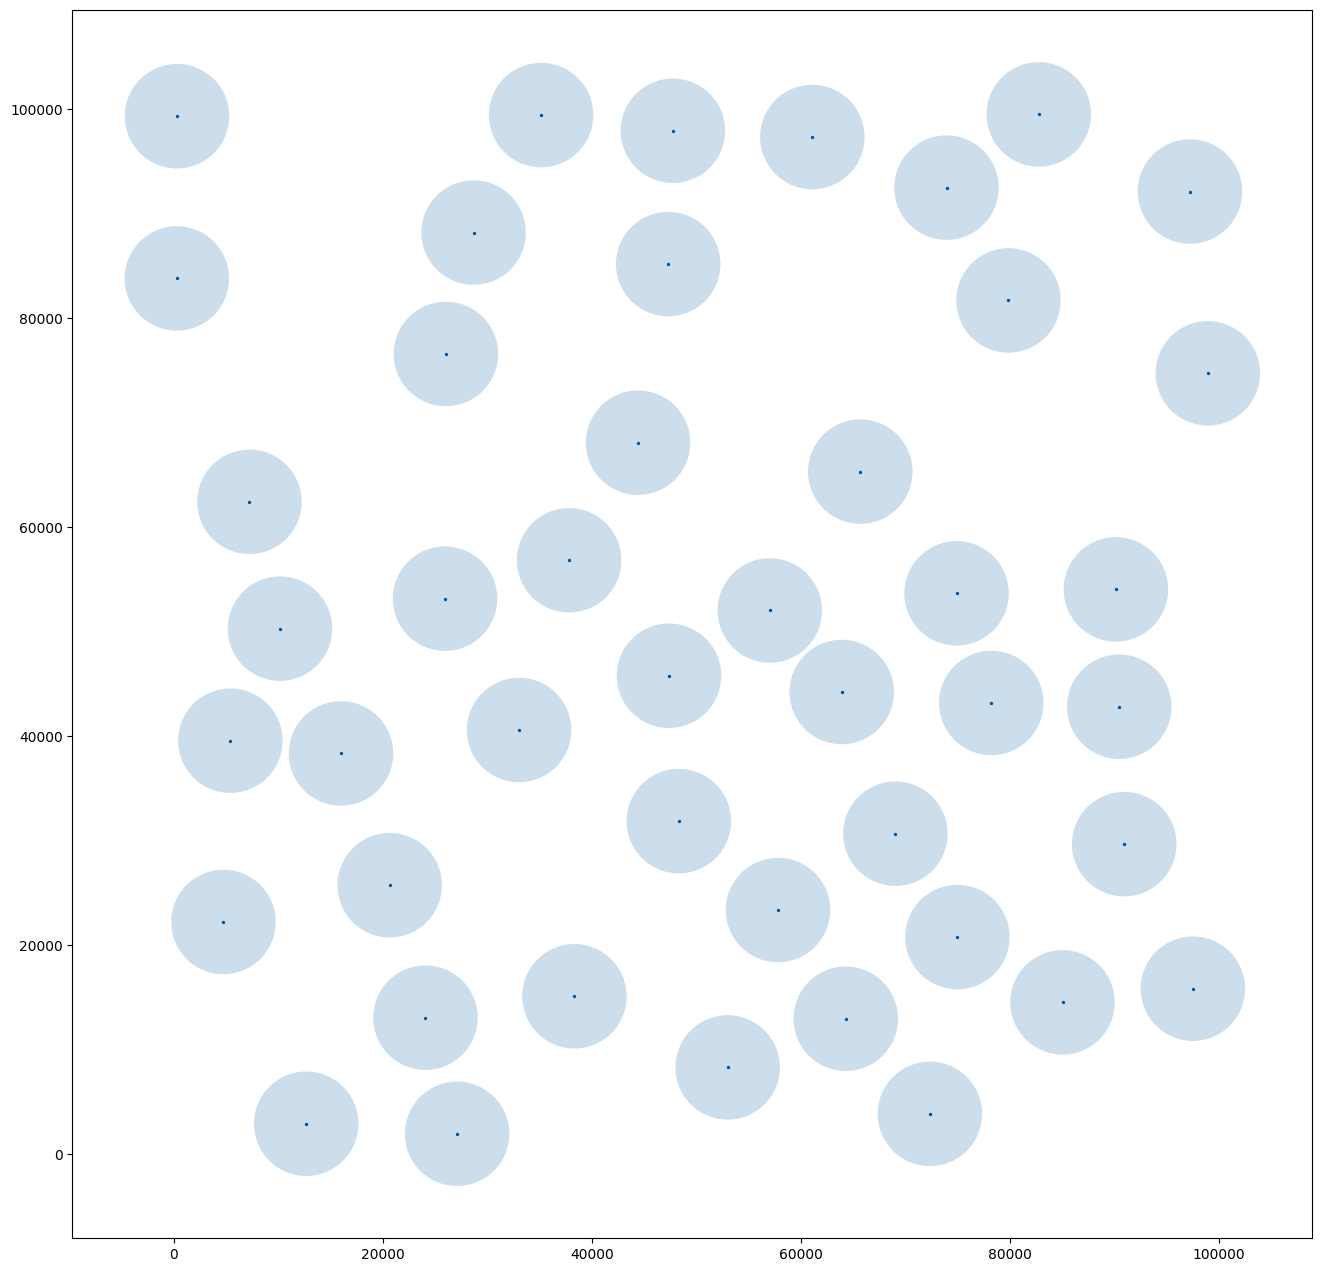

In [10]:
plots.spatial(df=samples_kept, points='points', sp_threshold=sp_threshold, colour='#0055a3')

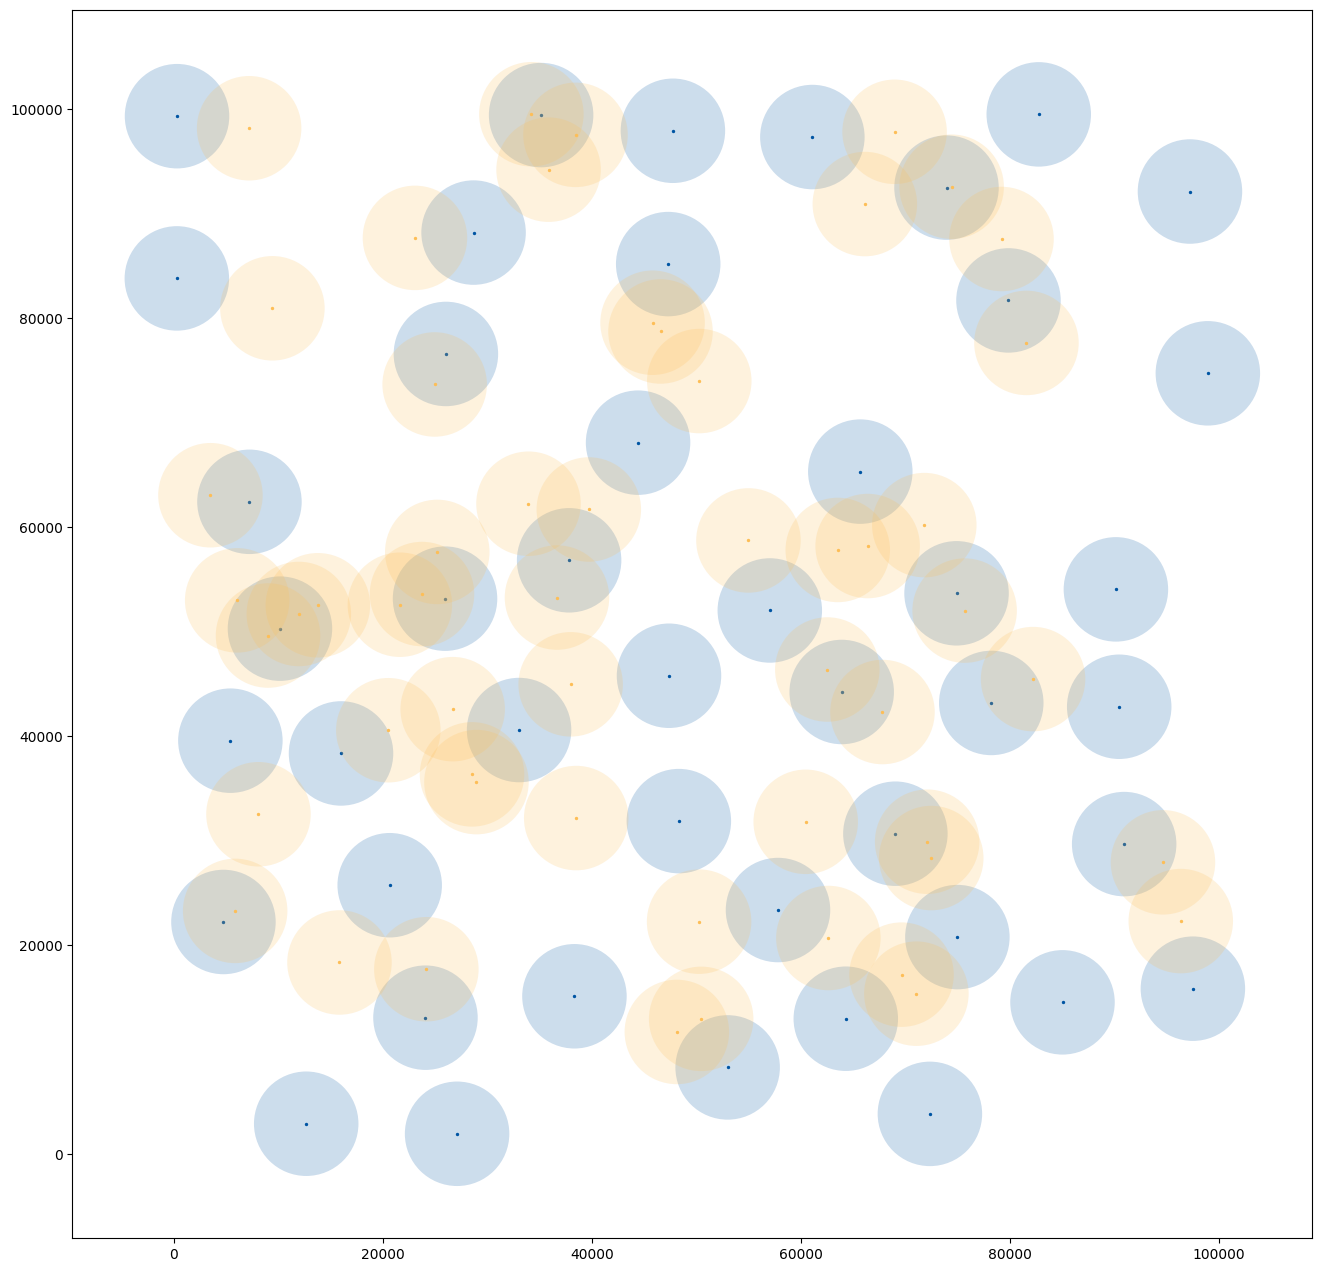

In [11]:
plots.spatial_thinned(df_kept=samples_kept, points_kept='points', df_removed=samples_removed, points_removed='points', sp_threshold=sp_threshold)

## Temporal thin
Here, we conduct a temporal only thin.
<br>The resulting DataFrame ```samples_kept``` contains only those datapoints that were kept after thinning.

In [12]:
samples_kept = thinst(df=samples, datetimes='datetimes', tm_threshold=tm_threshold, tm_unit=tm_unit)

For the sake of comparison, we can also get those datapoints that were removed with the following code.

In [13]:
samples_removed = samples.copy().loc[~samples.index.isin(samples_kept.index)]

### View the result
We now make two plots with time on the x axis (note that the y axis is meaningless and serves only to space the dots):
- the first of the kept datapoints (as blue dots with the temporal threshold illustrated by a pale line centred around each dot)
- the second of the kept datapoints (blue) and the removed datapoints (yellow)

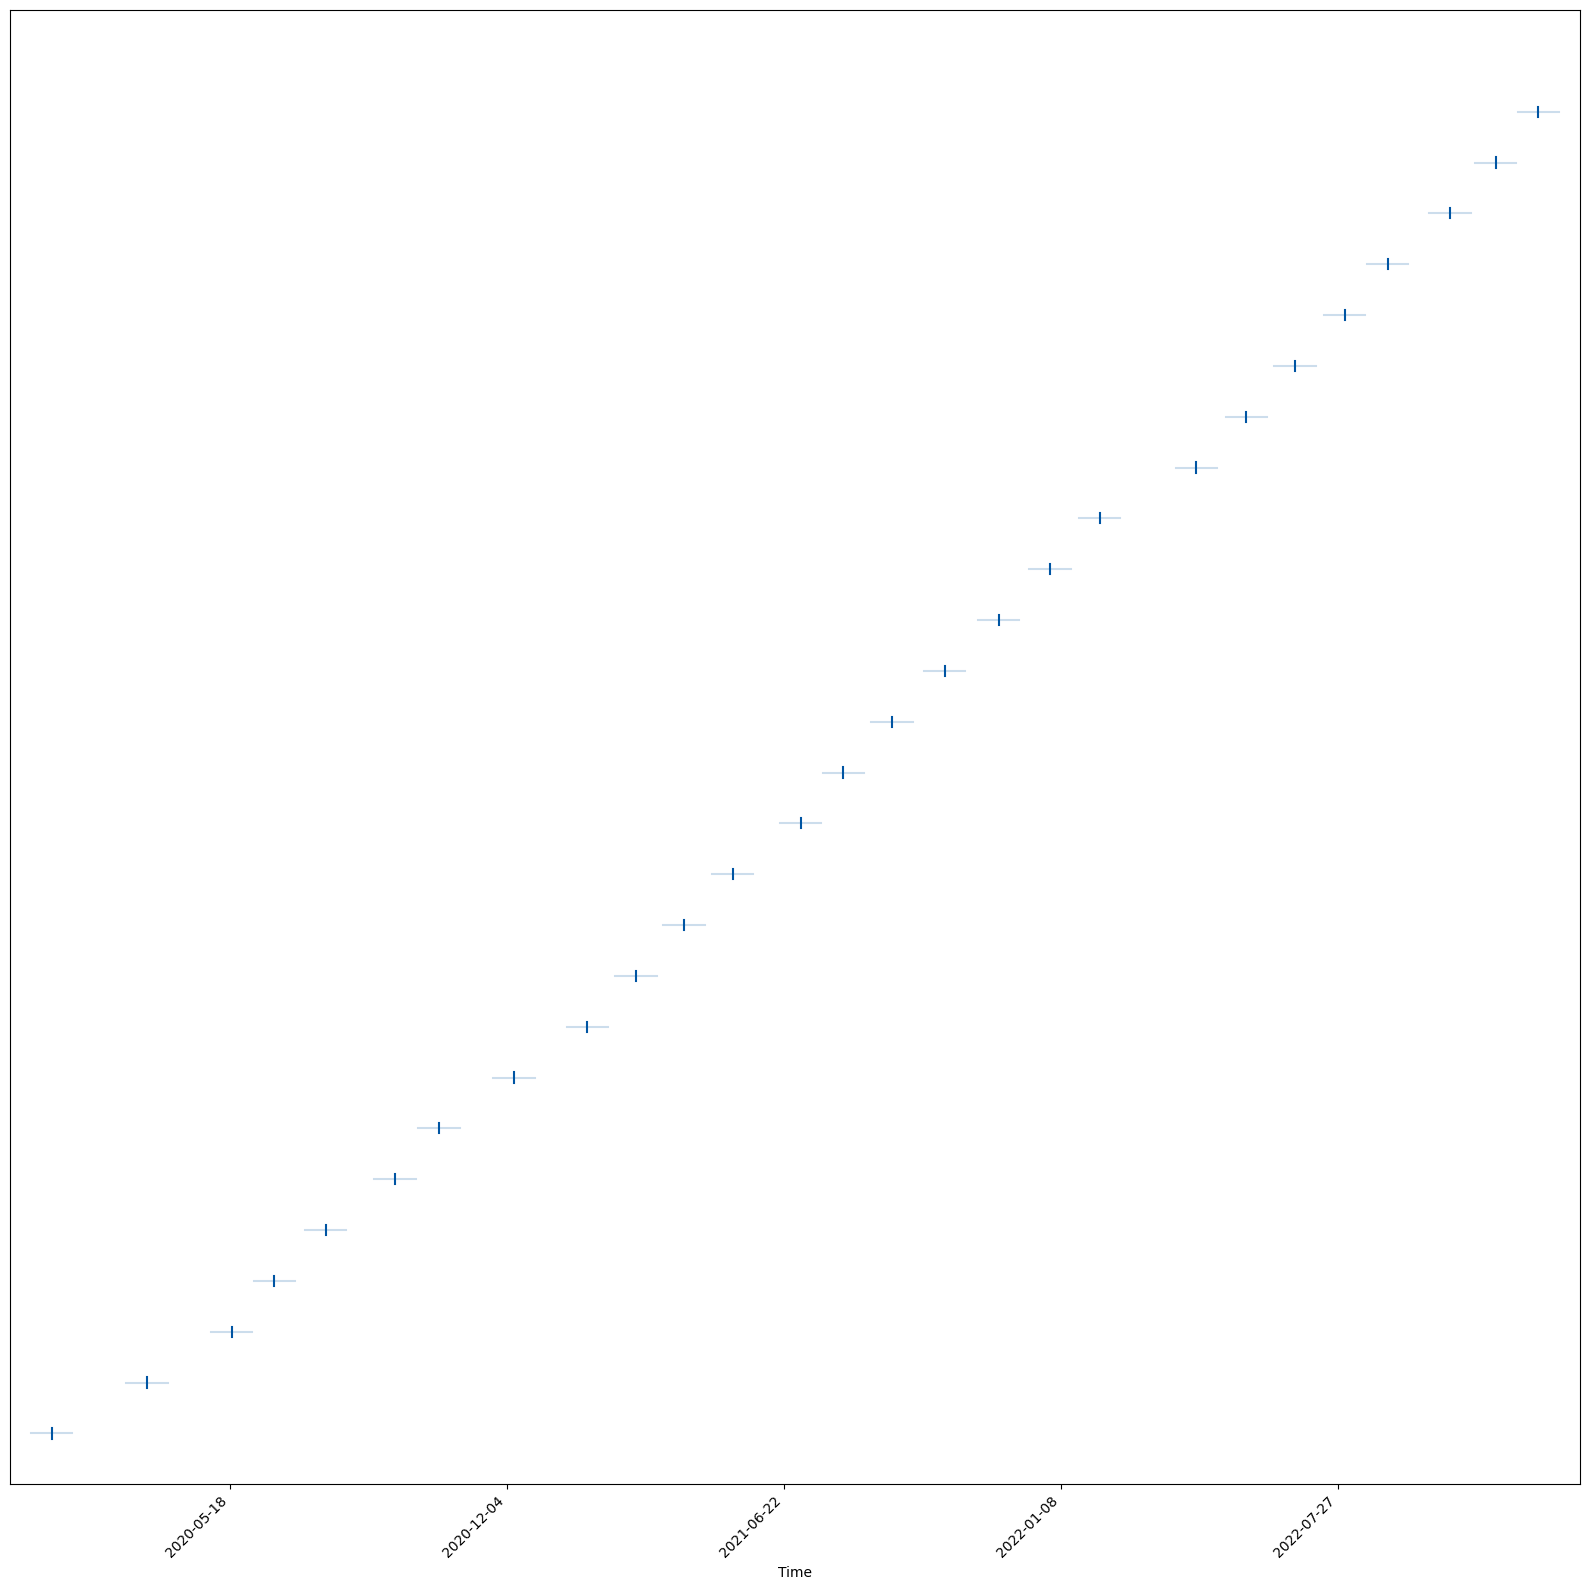

In [14]:
plots.temporal(df=samples_kept, datetimes='datetimes', tm_threshold=tm_threshold, tm_unit=tm_unit, colour='#0055a3')

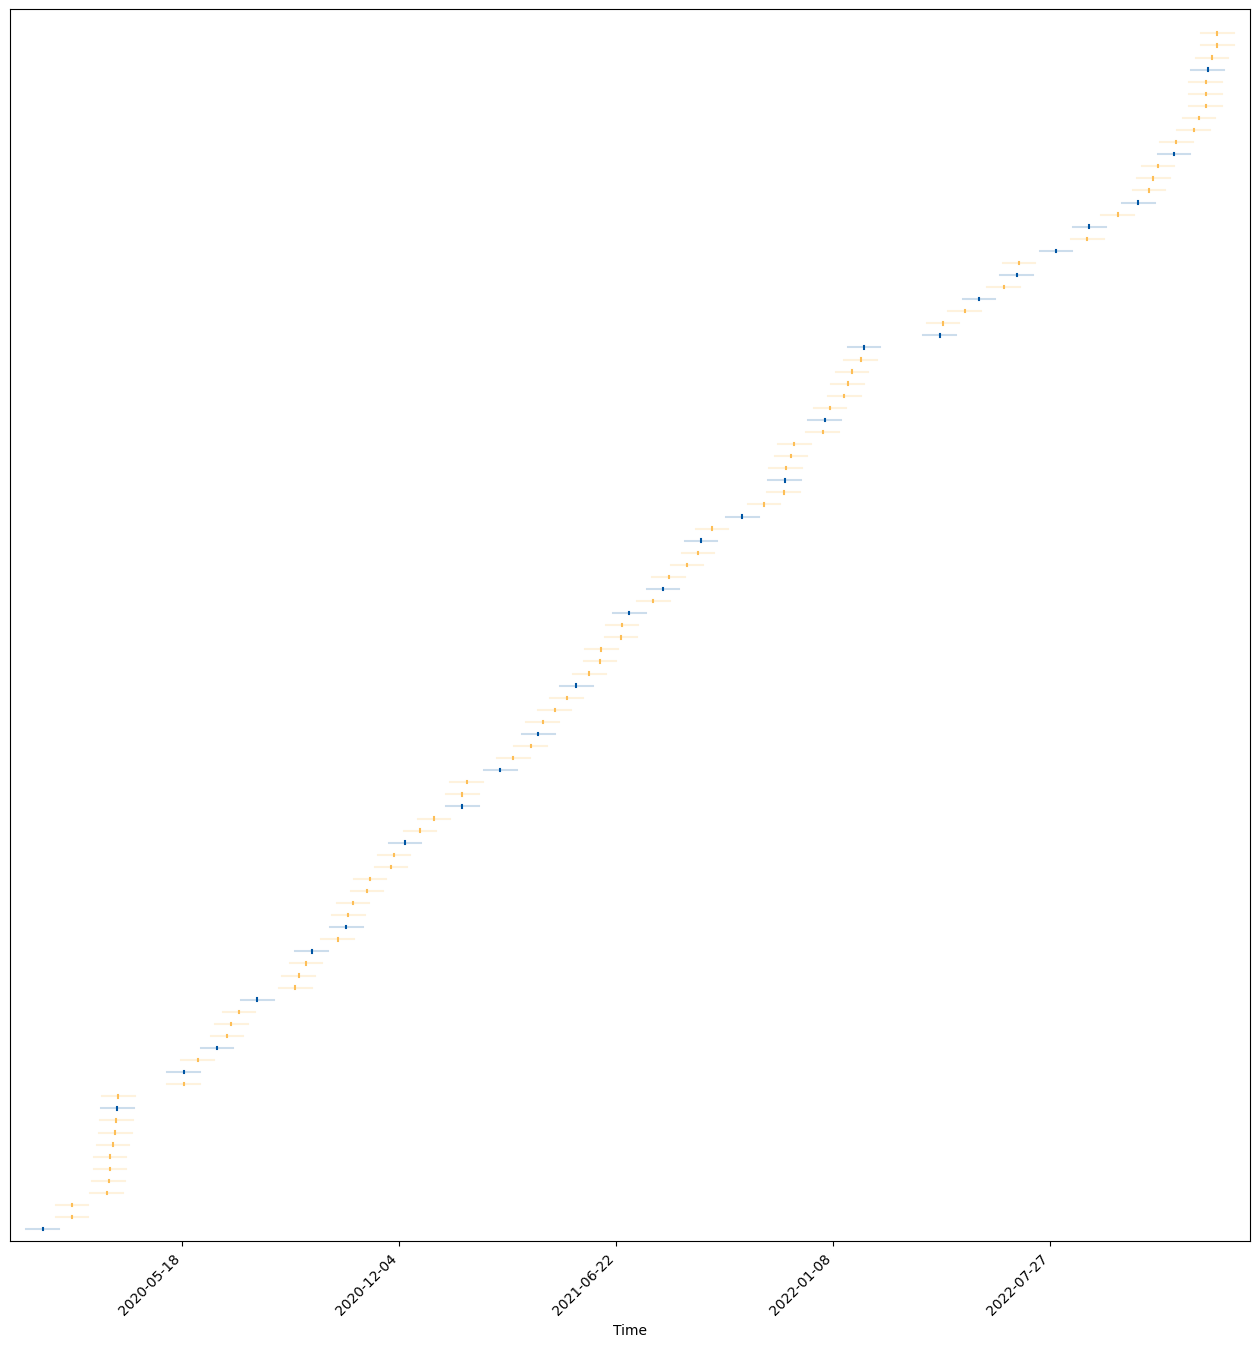

In [15]:
plots.temporal_thinned(df_kept=samples_kept, datetimes_kept='datetimes',
                       df_removed=samples_removed, datetimes_removed='datetimes',
                       tm_threshold=tm_threshold, tm_unit=tm_unit)

## Spatiotemporal thin
Here, we conduct a spatiotemporal thin.
<br>The resulting DataFrame ```samples_kept``` contains only those datapoints that were kept after thinning.

In [16]:
samples_kept = thinst(df=samples, points='points', sp_threshold=sp_threshold, datetimes='datetimes', tm_threshold=tm_threshold, tm_unit=tm_unit)

For the sake of comparison, we can also get those datapoints that were removed with the following code.

In [17]:
samples_removed = samples.copy().loc[~samples.index.isin(samples_kept.index)]

### View the result
We now make four plots:
- the first, a spatial plot of the kept datapoints (as blue dots with the spatial threshold illustrated by a pale circle around each dot)
- the second, a spatial plot of the kept datapoints (blue) and the removed datapoints (yellow)
- the third, a temporal plot of the kept datapoints (as blue dots with the temporal threshold illustrated by a pale line centred around each dot)
- the fourth, a temporal plot of the kept datapoints (blue) and the removed datapoints (yellow)

Note that some of the datapoints overlap spatially or temporally, however no two datapoints will overlap spatially _and_ temporally.

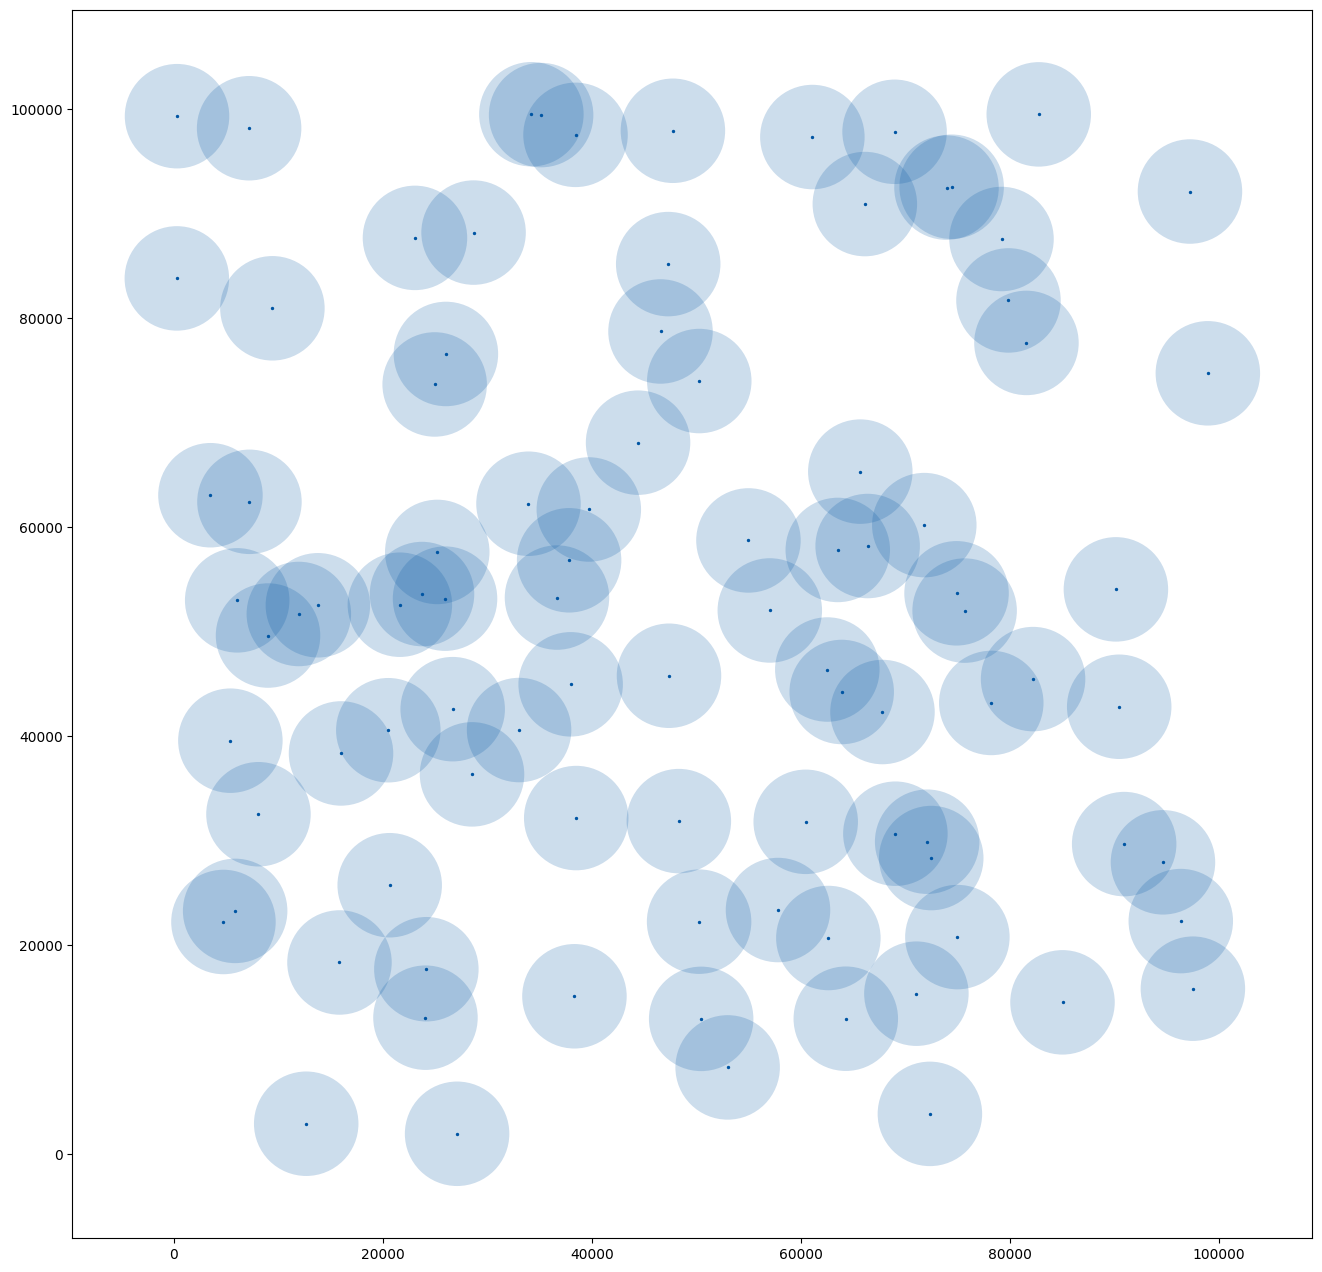

In [18]:
plots.spatial(df=samples_kept, points='points', sp_threshold=sp_threshold, colour='#0055a3')

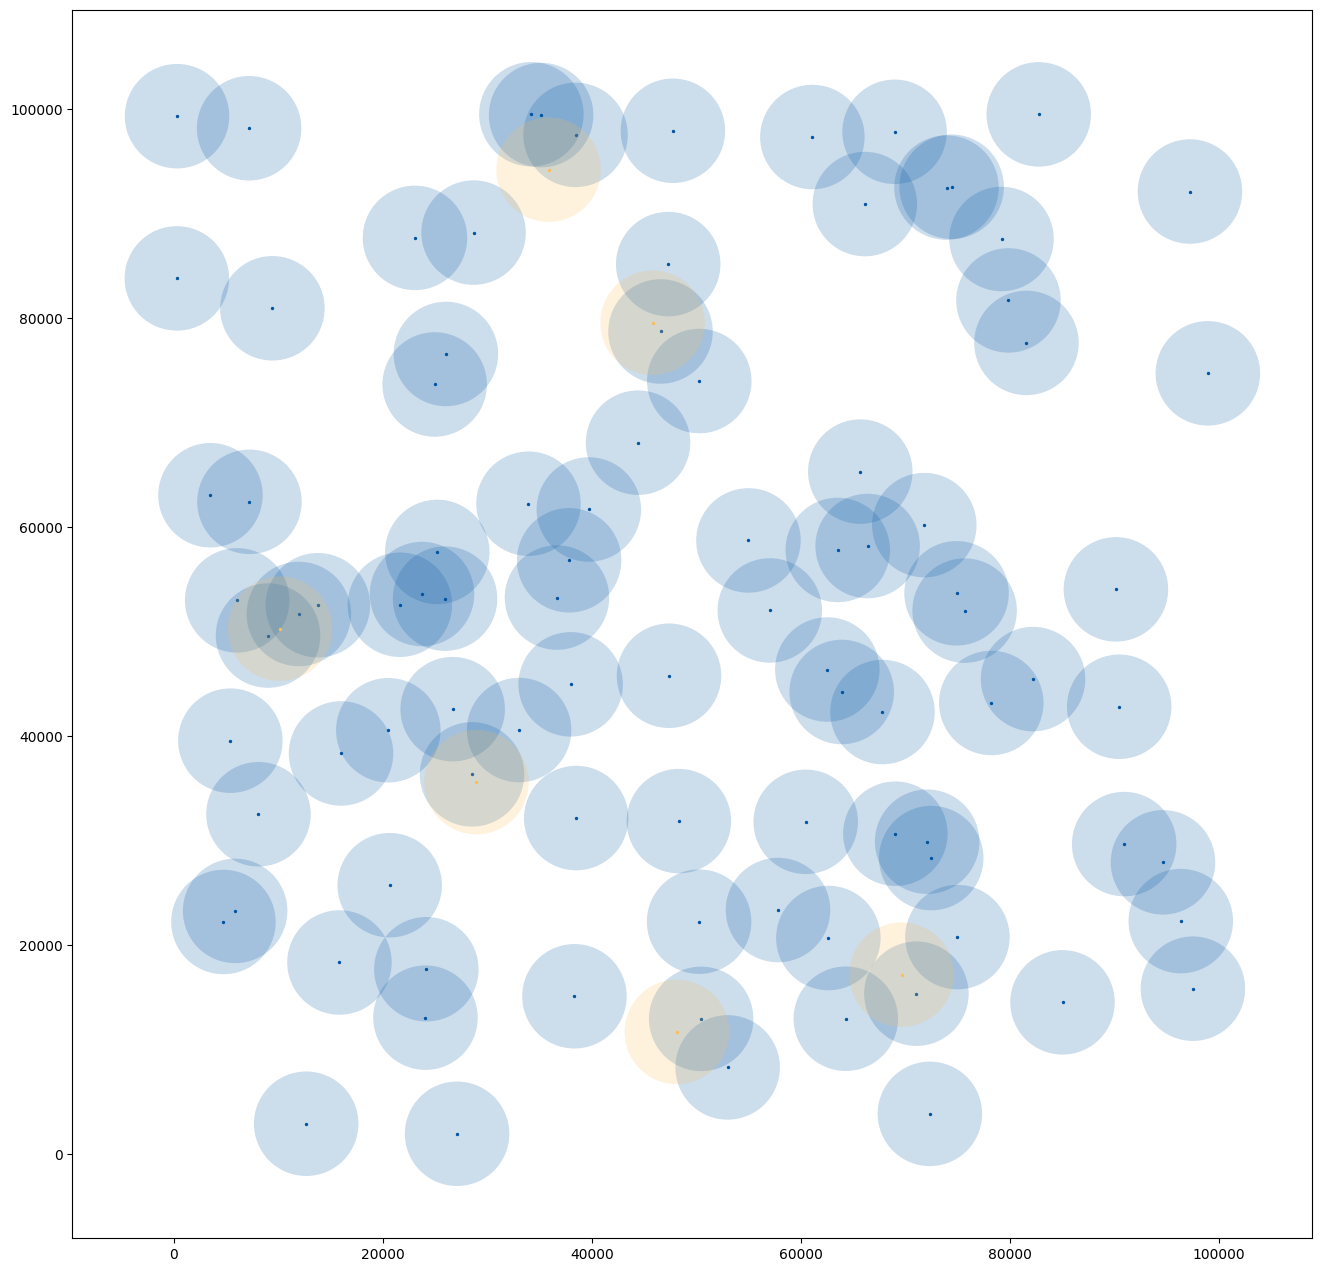

In [19]:
plots.spatial_thinned(df_kept=samples_kept, points_kept='points',
                      df_removed=samples_removed, points_removed='points', sp_threshold=sp_threshold)

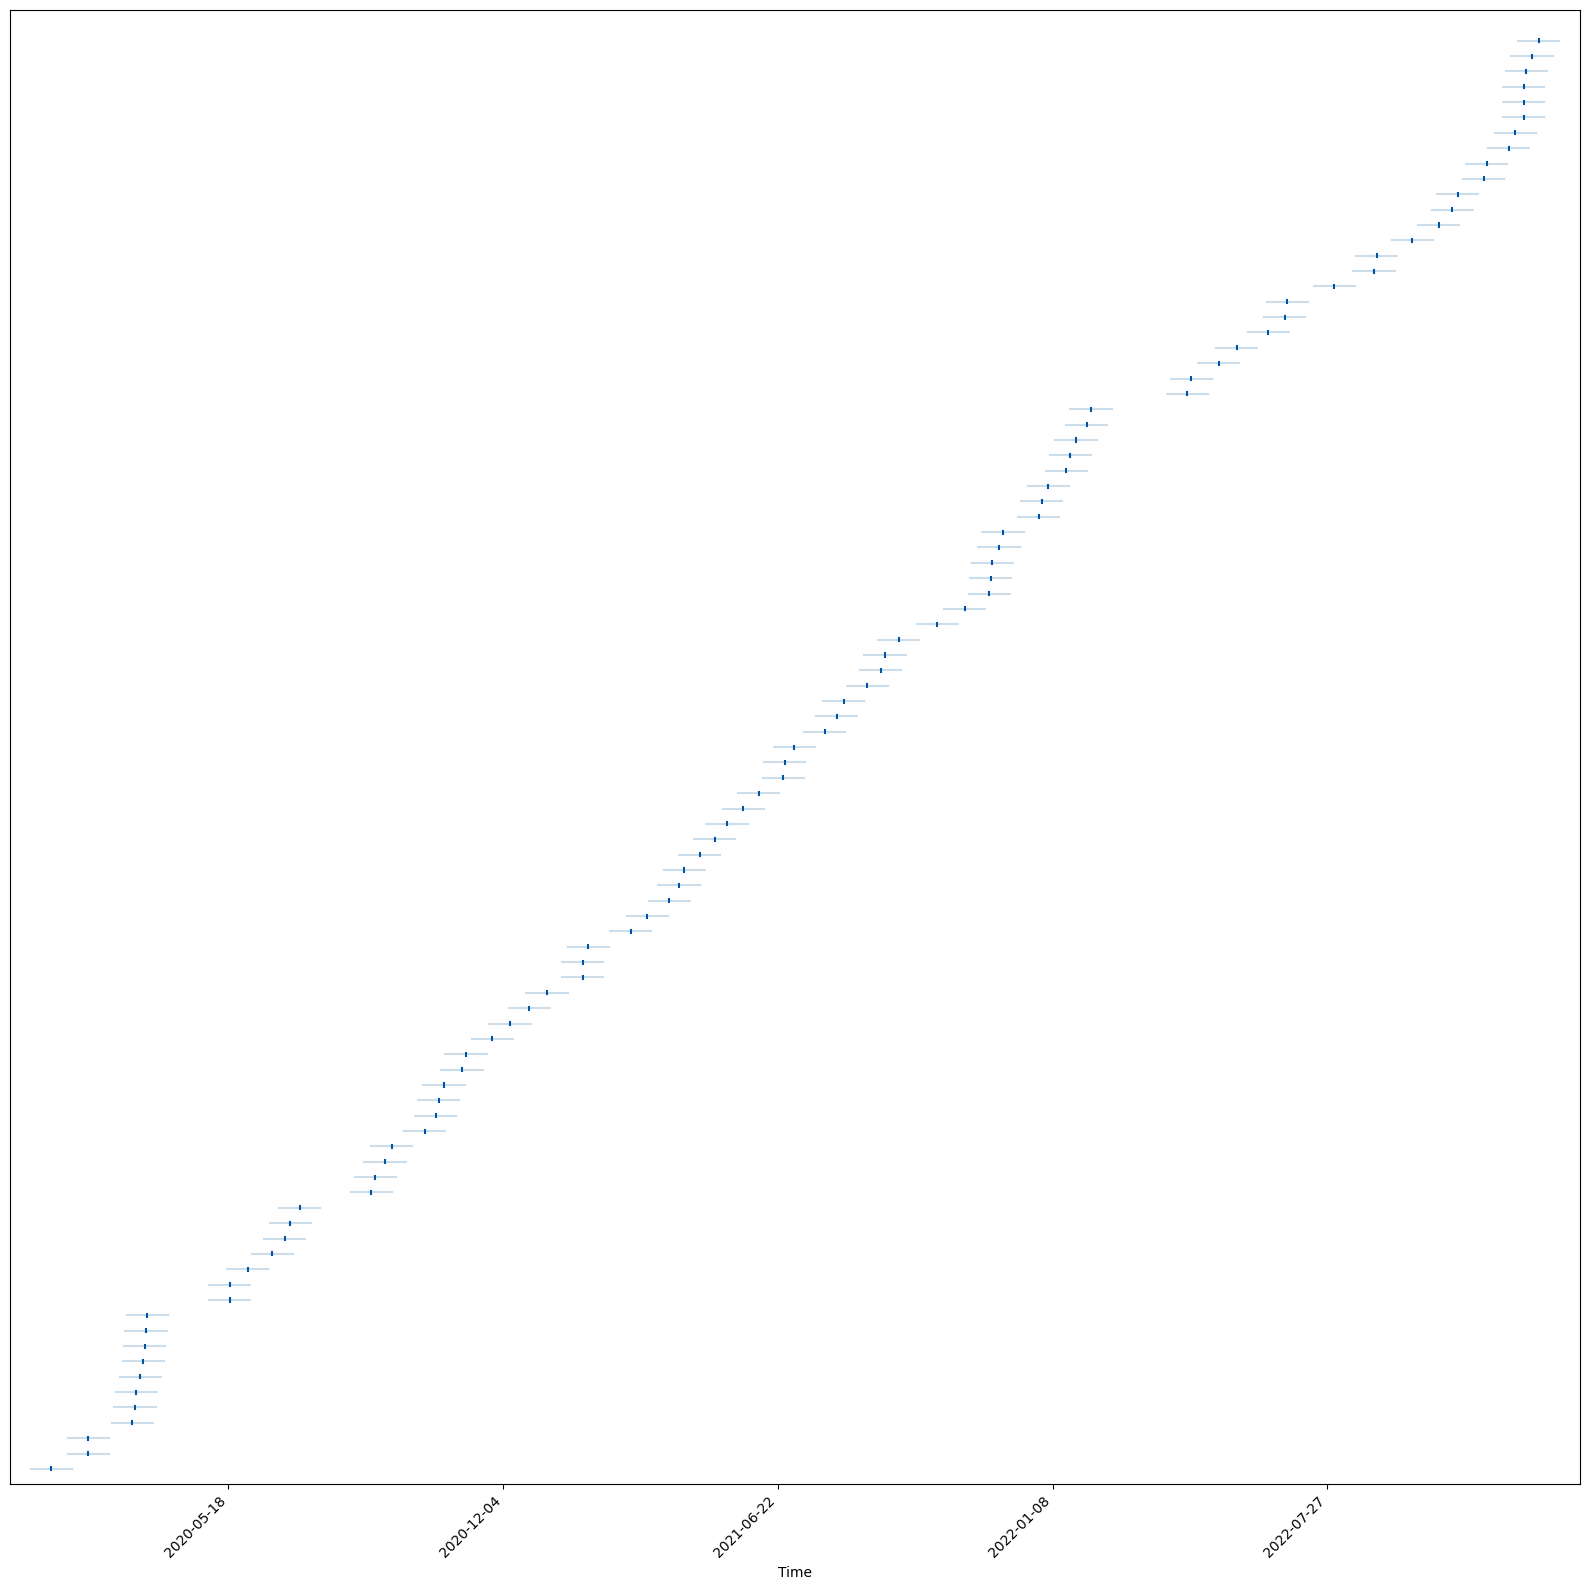

In [20]:
plots.temporal(df=samples_kept, datetimes='datetimes', tm_threshold=tm_threshold, tm_unit=tm_unit, colour='#0055a3')

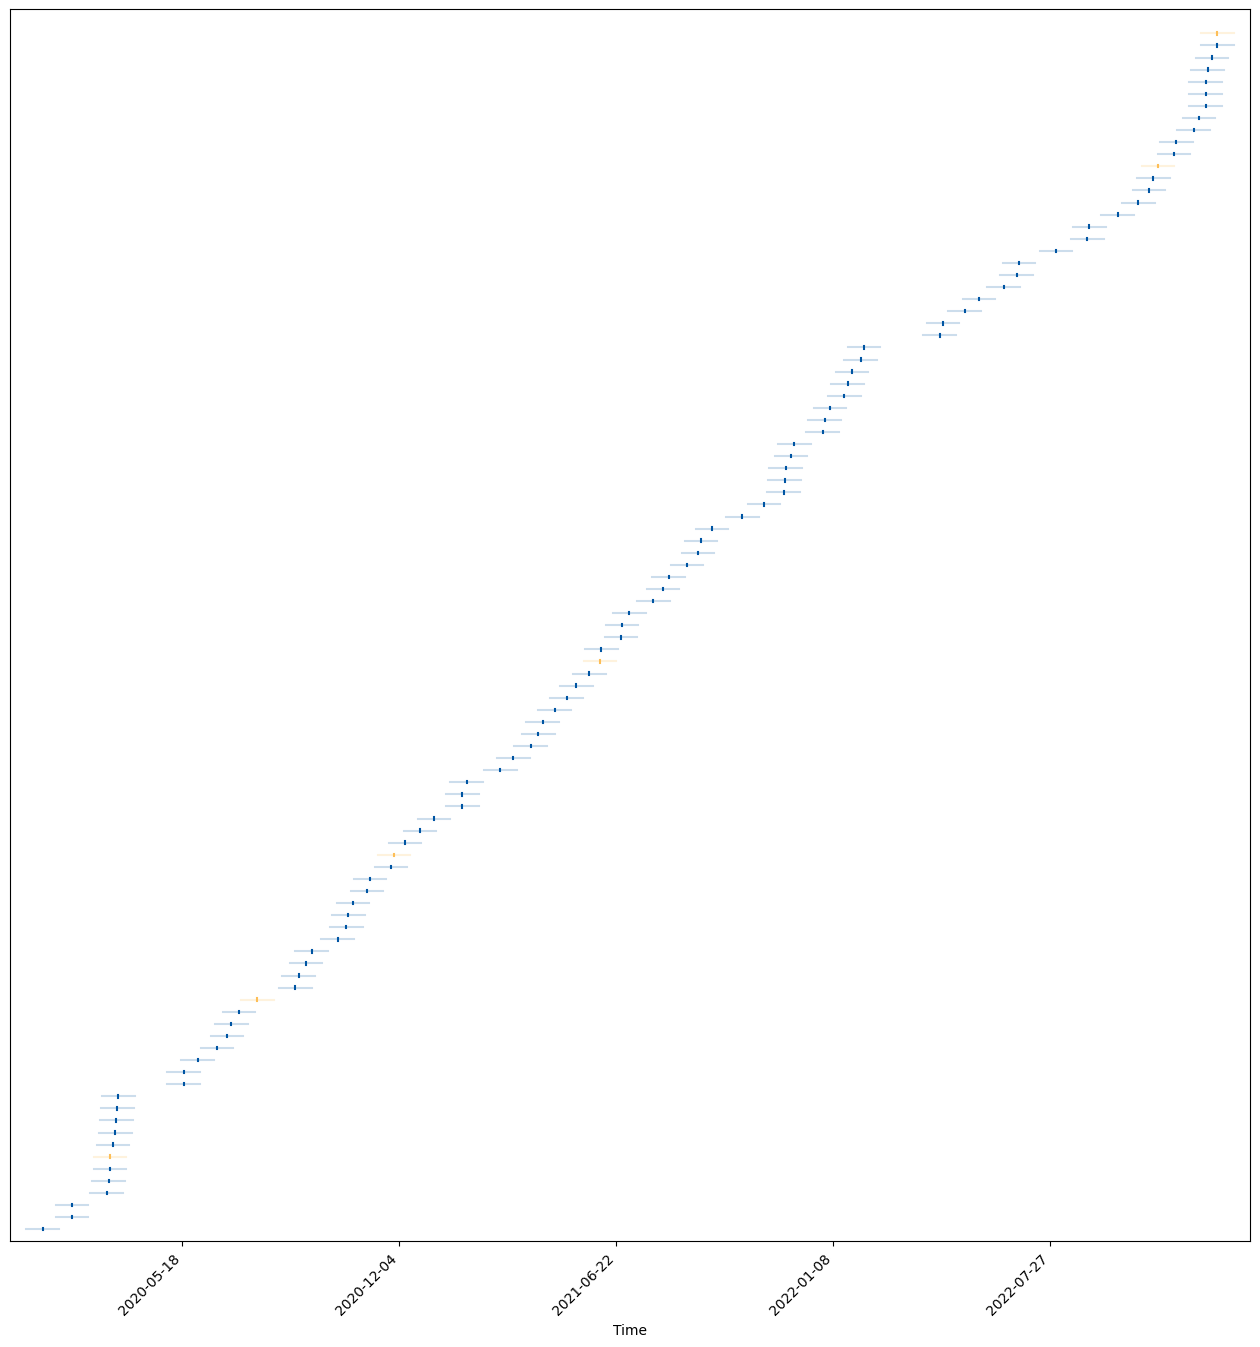

In [21]:
plots.temporal_thinned(df_kept=samples_kept, datetimes_kept='datetimes',
                       df_removed=samples_removed, datetimes_removed='datetimes',
                       tm_threshold=tm_threshold, tm_unit=tm_unit)

### View the result
To illustrate that no two points overlap spatially _and_ temporally, we can make an additional plot of datapoints that were kept (blue) and those that were removed (yellow) after thinning as cylinders with the spatial threshold illustrated by the diameter (x and y axes) and the temporal threshold illustrated by the height (z axis).
<br>Depending on the software that this plot is run in, it may be interactive and able to be rotated.

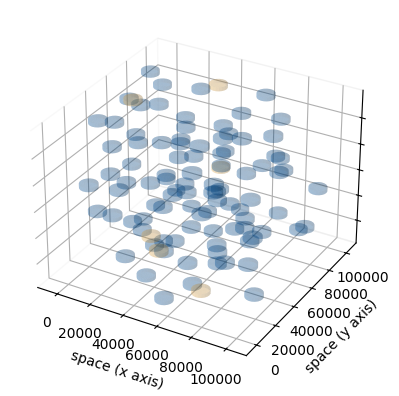

In [22]:
plots.spatiotemporal_thinned(df_kept=samples_kept, points_kept='points', datetimes_kept='datetimes',
                             df_removed=samples_removed, points_removed='points', datetimes_removed='datetimes',
                             sp_threshold=sp_threshold, tm_threshold=tm_threshold, tm_unit=tm_unit)